In [38]:
%matplotlib inline

In [39]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

import igraph as ig

In [40]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

#print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

#options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

#pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
#nx.draw(G, pos, **options)
#plt.show()

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDiegoState        11
Baylor               10
NorthTexas           10
NorthernIllinois     10
Northwestern         11
WesternMichigan      10
Wisconsin            12
Wyoming              11
Auburn               11
Akron                11
VirginiaTech         11
Alabama              11
UCLA                 11
Arizona              11
Utah                 11
ArkansasState        10
NorthCarolinaState   11
BallState            10
Florida              11
BoiseState            9
BostonCollege        11
WestVirginia         11
BowlingGreenState    11
Michigan             11
Virginia             10
Buffalo              11
Syracuse             11
CentralFlorida        8
GeorgiaTech          11
CentralMichigan      11
Purdue               11
Colorado             11
ColoradoState   

In [44]:
nx.is_connected(G)

True

In [45]:
print(list(G.nodes))

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [46]:
len(list(G.nodes))

115

In [47]:
list(G.adj['Iowa'])  # or list(G.neighbors(1))

['KansasState',
 'PennState',
 'Northwestern',
 'WesternMichigan',
 'Wisconsin',
 'OhioState',
 'Minnesota',
 'Illinois',
 'IowaState',
 'Nebraska',
 'MichiganState',
 'Indiana']

In [48]:
G.degree['Iowa']  # the number of edges incident to 1

12

In [49]:
nx.maximal_independent_set(G) 

['SanJoseState',
 'MichiganState',
 'Pittsburgh',
 'BallState',
 'Duke',
 'Texas',
 'Arkansas',
 'ArizonaState',
 'OregonState',
 'Louisville',
 'ArkansasState',
 'Minnesota',
 'MiddleTennesseeState',
 'Akron',
 'BrighamYoung',
 'Navy',
 'IowaState']

In [50]:
N = nx.neighbors(G,'Iowa')
for i in N:
    print(i)

KansasState
PennState
Northwestern
WesternMichigan
Wisconsin
OhioState
Minnesota
Illinois
IowaState
Nebraska
MichiganState
Indiana


In [51]:
path = nx.single_source_dijkstra_path(G, 'Iowa')
path['KansasState']

['Iowa', 'KansasState']

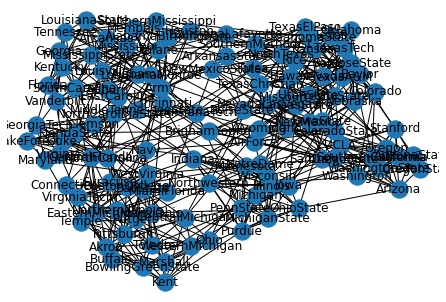

In [52]:
nx.draw(G, with_labels=True)
plt.show()

In [83]:
N = nx.number_of_nodes(G)
M = nx.number_of_edges(G)

arc = []
#dm=np.array(G.edges)
#dm = np.zeros((G.nodes,G.nodes), dtype=int)
#dm = [tuple(item) for item in G.edges]
#print(dm)

arc = [e for e in G.edges]
#dm = np.zeros((arc), dtype=int)

dm = np.array(np.array(arc))

p = nx.shortest_path(G)

#type(p)


#for i,j in p.items():
#    print(i)
#    print(j)

#    print(p[i,j])
#for i in G:
#    for j in G:
#        print(p[i,j])
#print(p)
#for i in G.edges:
#        print(len(p[i])-1)
#        dm[i][j] = len(p[i][j])-1

#for i in G.edges:
#    print(dm[i])
#    for j in G:
#        print(dm[i][j])
        #print(len(p[i][j])-1)
        #dm[i][j] = len(p[i][j])-1
#    for j in G:
#        dm[i][j] = len(p[i][j])


BrighamYoung
{'BrighamYoung': ['BrighamYoung'], 'FloridaState': ['BrighamYoung', 'FloridaState'], 'NewMexico': ['BrighamYoung', 'NewMexico'], 'SanDiegoState': ['BrighamYoung', 'SanDiegoState'], 'Wyoming': ['BrighamYoung', 'Wyoming'], 'Utah': ['BrighamYoung', 'Utah'], 'Virginia': ['BrighamYoung', 'Virginia'], 'Syracuse': ['BrighamYoung', 'Syracuse'], 'ColoradoState': ['BrighamYoung', 'ColoradoState'], 'MississippiState': ['BrighamYoung', 'MississippiState'], 'UtahState': ['BrighamYoung', 'UtahState'], 'AirForce': ['BrighamYoung', 'AirForce'], 'NevadaLasVegas': ['BrighamYoung', 'NevadaLasVegas'], 'NorthCarolinaState': ['BrighamYoung', 'FloridaState', 'NorthCarolinaState'], 'Florida': ['BrighamYoung', 'FloridaState', 'Florida'], 'GeorgiaTech': ['BrighamYoung', 'FloridaState', 'GeorgiaTech'], 'Duke': ['BrighamYoung', 'FloridaState', 'Duke'], 'Louisville': ['BrighamYoung', 'FloridaState', 'Louisville'], 'NorthCarolina': ['BrighamYoung', 'FloridaState', 'NorthCarolina'], 'MiamiFlorida': ['Br

In [111]:
N = nx.number_of_nodes(G)
M = nx.number_of_edges(G)

lb = np.zeros((N), dtype=int)
ub = np.zeros((N), dtype=int)
time = np.zeros((N), dtype=int)
gap = np.zeros((N), dtype=int)
nodes = np.zeros((N), dtype=int)

for i in G:

    model = gp.Model("tukey") #cria o modelo

    x = model.addVars(N, vtype=GRB.BINARY, name='x') #Adicionando Variáveis 
    
    obj = 0
    for j in G:
        obj += 1 * x[j]
         
    model.setObjective(obj, GRB.MINIMIZE)
    
    # configurando parametros
    # model.Params.TimeLimit = 60
    model.Params.MIPGap = 1.e-6
    model.Params.Threads = 1
    # model.Params.Presolve = 0
    # model.Params.Cuts = 0
 
    # Turn off display and heuristics
    gp.setParam('OutputFlag', 0)
    gp.setParam('Heuristics', 0)

    constr0 = 0
    constr0 += 1*x[i]
    model.addConstr(constr0 == 1)

    for u in range(0,N):
        for w in range(u+1,N):
            if dm[u,w] <= N:
                for s in range(0,N):
                    if (s != u) and (s != w):
                        if (dm[u,s] + dm[s,w] == dm[u,w]):
                            constr1 = x[u] + x[w]
                            model.addConstr(constr1 >= x[s])

    #relax = model.relax()    
    #relax.optimize()

    model.optimize()
    
    lb[i] = model.objBound
    ub[i] = model.objVal
    gap[i] = model.MIPGap
    time[i] = model.Runtime
    nodes[i] = model.NodeCount

In [69]:
t = 0
for i in ub:
    print("tukey[%d] =" %t, end=" ")
    print("%g" %i)
    t = t+1

tukey[0] = 21
tukey[1] = 21
tukey[2] = 19
tukey[3] = 3
tukey[4] = 2
tukey[5] = 3
tukey[6] = 3
tukey[7] = 1
tukey[8] = 19
tukey[9] = 19
tukey[10] = 2
tukey[11] = 1
tukey[12] = 1
tukey[13] = 19
tukey[14] = 1
tukey[15] = 1
tukey[16] = 1
tukey[17] = 1
tukey[18] = 1
tukey[19] = 19
tukey[20] = 1
tukey[21] = 1
tukey[22] = 1
tukey[23] = 19
tukey[24] = 19
tukey[25] = 19
tukey[26] = 1
tukey[27] = 19
tukey[28] = 19
tukey[29] = 2
tukey[30] = 19
tukey[31] = 19
tukey[32] = 19
tukey[33] = 19


In [72]:
N = nx.number_of_nodes(G)
M = nx.number_of_edges(G)

lb = np.zeros((N), dtype=int)
ub = np.zeros((N), dtype=int)
time = np.zeros((N), dtype=int)
gap = np.zeros((N), dtype=int)
nodes = np.zeros((N), dtype=int)

for i in G:

    model = gp.Model("tukey") #cria o modelo

    # configurando parametros
    # model.Params.TimeLimit = 60
    model.Params.MIPGap = 1.e-6
    model.Params.Threads = 1
    # model.Params.Presolve = 0
    # model.Params.Cuts = 0

    x = model.addVars(N, vtype=GRB.BINARY, name='x') #Adicionando Variáveis 
    
    obj = 0
    for j in G:
        obj += 1 * x[j]
         
    model.setObjective(obj, GRB.MAXIMIZE)
     
    # Turn off display and heuristics
    gp.setParam('OutputFlag', 0)
    gp.setParam('Heuristics', 0)

    constr0 = 0
    constr0 += 1 * x[i]
    model.addConstr(constr0 == 0)

    for u in range(0,N):
        for w in range(u+1,N):
            if dm[u,w] <= N:
                for s in range(0,N):
                    if (s != u) and (s != w):
                        if (dm[u,s] + dm[s,w] == dm[u,w]):
                            constr1 = x[u] + x[w]
                            model.addConstr(constr1 <= 1 + x[s])

    #relax = model.relax()
    #relax.optimize()

    model.optimize()

    lb[i] = N - model.objBound
    ub[i] = N - model.objVal
    gap[i] = model.MIPGap
    time[i] = model.Runtime
    nodes[i] = model.NodeCount

In [73]:
t = 0
for i in ub:
    print("tukey[%d] =" %t, end=" ")
    print("%g" %i)
    t = t+1

tukey[0] = 21
tukey[1] = 21
tukey[2] = 19
tukey[3] = 3
tukey[4] = 2
tukey[5] = 3
tukey[6] = 3
tukey[7] = 1
tukey[8] = 19
tukey[9] = 19
tukey[10] = 2
tukey[11] = 1
tukey[12] = 1
tukey[13] = 19
tukey[14] = 1
tukey[15] = 1
tukey[16] = 1
tukey[17] = 1
tukey[18] = 1
tukey[19] = 19
tukey[20] = 1
tukey[21] = 1
tukey[22] = 1
tukey[23] = 19
tukey[24] = 19
tukey[25] = 19
tukey[26] = 1
tukey[27] = 19
tukey[28] = 19
tukey[29] = 2
tukey[30] = 19
tukey[31] = 19
tukey[32] = 19
tukey[33] = 19


In [74]:
N = nx.number_of_nodes(G)
M = nx.number_of_edges(G)

lb = np.zeros((N), dtype=int)
ub = np.zeros((N), dtype=int)
time = np.zeros((N), dtype=int)
gap = np.zeros((N), dtype=int)
nodes = np.zeros((N), dtype=int)

for i in G:

    model = gp.Model("tukey") #cria o modelo

    # configurando parametros
    # model.Params.TimeLimit = 60
    model.Params.MIPGap = 1.e-6
    model.Params.Threads = 1
    # model.Params.Presolve = 0
    # model.Params.Cuts = 0

    x = model.addVars(N, vtype=GRB.BINARY, name='x') #Adicionando Variáveis 
    
    obj = 0
    for j in G:
        obj += 1 * x[j]
         
    model.setObjective(obj, GRB.MAXIMIZE)
     
    # Turn off display and heuristics
    gp.setParam('OutputFlag', 0)
    gp.setParam('Heuristics', 0)

    constr0 = 0
    constr0 += 1 * x[i]
    model.addConstr(constr0 == 0)

    for u in range(0,N):
        for w in range(u+1,N):
            if dm[u,w] <= N:
                for s in range(0,N):
                    if (s != u) and (s != w):
                        if (dm[u,s] + dm[s,w] == dm[u,w]):
                            constr1 = x[u] + x[w]
                            model.addConstr(constr1 <= 1 + x[s])

                            Is = nx.maximal_independent_set(G, [s])
                            for k in Is:
                                constr2 = 1 * x[k]
                            constr2 += 1 + (len(Is)- 1)*x[s]                            

    #relax = model.relax()
    #relax.optimize()

    model.optimize()

    lb[i] = N - model.objBound
    ub[i] = N - model.objVal
    gap[i] = model.MIPGap
    time[i] = model.Runtime
    nodes[i] = model.NodeCount

In [75]:
t = 0
for i in ub:
    print("tukey[%d] =" %t, end=" ")
    print("%g" %i)
    t = t+1

tukey[0] = 21
tukey[1] = 21
tukey[2] = 19
tukey[3] = 3
tukey[4] = 2
tukey[5] = 3
tukey[6] = 3
tukey[7] = 1
tukey[8] = 19
tukey[9] = 19
tukey[10] = 2
tukey[11] = 1
tukey[12] = 1
tukey[13] = 19
tukey[14] = 1
tukey[15] = 1
tukey[16] = 1
tukey[17] = 1
tukey[18] = 1
tukey[19] = 19
tukey[20] = 1
tukey[21] = 1
tukey[22] = 1
tukey[23] = 19
tukey[24] = 19
tukey[25] = 19
tukey[26] = 1
tukey[27] = 19
tukey[28] = 19
tukey[29] = 2
tukey[30] = 19
tukey[31] = 19
tukey[32] = 19
tukey[33] = 19
